# <u> Bohemian Rhapsody fan with LSTM <u>

In this notebook we are going to train a Long Short-Term Memory (LSTM) network to memorize and then generate the lyrics of Bohemian Rhapsody.

In [2]:
# Load from torch package
import torch
from torch.utils.data import DataLoader

# Load from toytorch package
from toytorch.models import LSTMLanguageModel
from toytorch.datasets.load import load_txt_data
from toytorch.data_utils import WordDataProcessor

# Choose device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'The device is: {device}')

The device is: cpu


### Load and process data

We first load the Bohemian Rhapsody lyrics which are stored in a .txt file already included in the toytorch package. The "load_txt_data" function takes care of loading. The "WordDataProcessor" defined in toytorch.data_utils takes the data and constructs the vocabulary using a word tokenizer based on the splitting of the string according to the backspace '\b'. The instance "data_processor" can also directly be used as the input of the torch DataLoader, which requires picking a batch_size used during training.

In [3]:
# Load data
full_text = load_txt_data("BohemianRhapsody.txt")

# Tokenize text and create vocabulary
sequence_length = 16
data_processor = WordDataProcessor(full_text, sequence_length)

# Create Data Loader
batch_size = 8
data_loader = DataLoader(data_processor, batch_size, shuffle=True, pin_memory=True) 

Total number of tokens: 789
Vocabulary size: 191
Tokens in 1 epoch of training: 12,368


### Initialize Model

We now import and initialize the "LSTMLanguageModel" we built in the models.py module in toytorch. This model contains an Embedding and Dropout layers as well as several LSTM layers, all obtained from the layers.py module.

In [4]:
# Model Parameters
vocab_dim = data_processor.vocabulary_size
embed_dim = 300
num_layers = 4
dropout_rate = 0.1

# Initialize Model
torch.manual_seed(0)
model = LSTMLanguageModel(vocab_dim, embed_dim, num_layers, dropout_rate)

Number of parameters in model: 2,946,900


### Train Model

The model is trained on a GPU using the ".train_model" method in the class LSTMLanguageModel (see models.py in toytorch).

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

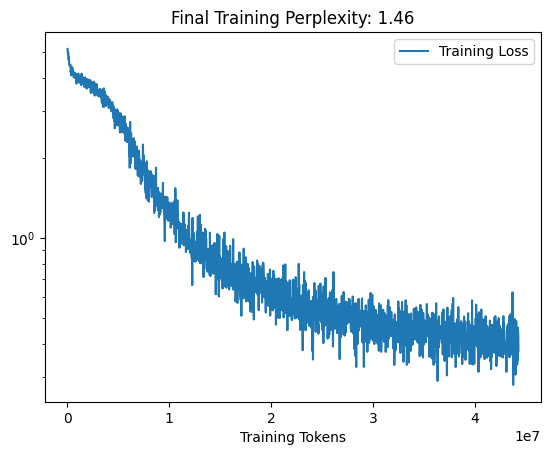

In [5]:
# Parameters
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
epochs = 20

# Train
training_tokens, training_loss = model.train_model(data_loader, optimizer, epochs,
                                                   device, learning_schedule=True)
# Save final model
torch.save(model.state_dict(), 'BohemianRhapsody_LSTM_model.pt')

### Generate Text

Finally, we can use the trained model to generate the lyrics of Bohemian Rhapsody.

In [8]:
# Inputs
prompt = "Is this the real"
num_tokens = 300
temp = 1

# Generate text
enc_prompt = torch.tensor(data_processor.int_encoder(prompt))
out = model.generate_text(enc_prompt, num_tokens, temp, device)

print(data_processor.int_decoder(out))

Is this the real life?
Is this just fantasy?
Caught in a landslide
No escape from reality

Open your eyes
Look up to the skies and see
I'm just a poor boy, I need no sympathy
Because I'm easy come, easy go
Little high, little low
Any way the wind blows
Doesn't really matter to me, to me

Mama, just killed a man
Put a gun against his head
Pulled my trigger, now he's dead
Mama, life had just begun
But now I've gone and thrown it all away

Mama, ooh
Didn't mean to make you cry
If I'm not back again this time tomorrow
Carry on, carry on as if nothing really matters

Too late, my time has come
Sends shivers down my spine
Body's aching all the time
Goodbye, everybody, I've got to go
Gotta leave you all behind and face the truth
